# **Beginner ML Project: Classifying Iris Flowers with Logistic Regression, Decision Tree & KNN**

## **Importing** necessary library

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

## **Load and Understand the Dataset**

In [63]:
# loeading the dataset
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [64]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [65]:
# Create DataFrame from the data
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target (species)
df['species'] = iris.target

In [66]:
# Map the target numbers to species names
df['species'] = df['species'].map({i:name for i, name in enumerate(iris.target_names)})


In [67]:
# exploring the dataset
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [68]:
df.shape
print("there are 150 rows and 5 columns")

there are 150 rows and 5 columns


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [70]:
# all species in the dataset
print(df['species'].value_counts())

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [71]:
# checking for any null values
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


In [72]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## **Data Visualization (EDA)**

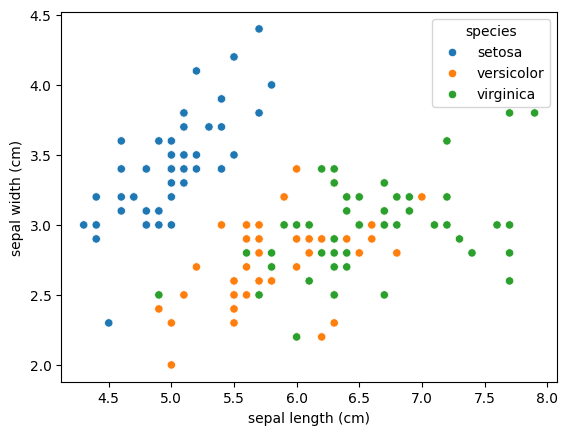

In [73]:
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species')
plt.show()

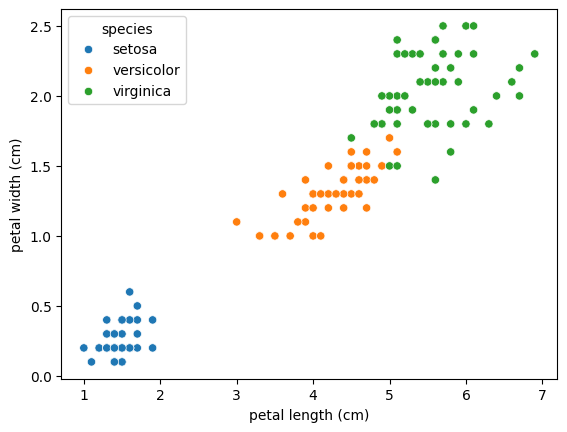

In [74]:
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='species')
plt.show()

In [75]:
# checking for duplicates
duplicate_value=df.duplicated().sum()
print(f"there is {duplicate_value} in the dataset")

there is 1 in the dataset


In [76]:
# grouping the data by species
df.groupby('species').describe()

sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
setosa                  50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)         ... petal length (cm)       \
                      count   mean  ...               75%  max   
species                             ...                          
setosa                 50.0  3.428  ...             1.575  1.9   
versicolor             50.0  2.770  ...             4.600  5.1   
virginica              50.0  2.974  ...             5.875  6.9   

           petal width (cm)                                            
                      count   mean       std  min  25%  50%  75%  max  
species                                                                
setosa                 50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor             50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica              50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

## **Data Preprocessing**

In [77]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [82]:
# converted the species column to numerical values through LabelEncoder
labelenc=LabelEncoder()
df['species']=labelenc.fit_transform(df['species'])
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [83]:
# dividing the data into features and target
X=df.drop('species',axis=1)
y=df['species']

# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

**Logistic Regression**

In [96]:
# training the model through Logistic Regression and displaying the accuracy score

logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

**KNN**

In [97]:
# training the model through KNN and displaying the accuracy score

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [98]:
# training the model through Decision Tree and displaying the accuracy score

dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)


DecisionTreeClassifier()

In [103]:
# displaying all the model acuracy scores
print("Accuracy score of Logistic Regression:",logreg.score(X_train,y_train)*100)
print("Accuracy score of KNN:",knn.score(X_train,y_train)*100)
print("Accuracy score of Decision Tree:",dtree.score(X_train,y_train)*100)

Accuracy score of Logistic Regression: 97.5
Accuracy score of KNN: 96.66666666666667
Accuracy score of Decision Tree: 100.0


In [104]:
# Making predictions
y_pred=logreg.predict(X_test)
y_pred_knn=knn.predict(X_test)
y_pred_dtree=dtree.predict(X_test)

In [107]:
# Confusion matrix
cm_log = confusion_matrix(y_test, y_pred)
cm_tree = confusion_matrix(y_test, y_pred_dtree)
cm_knn = confusion_matrix(y_test, y_pred_knn)

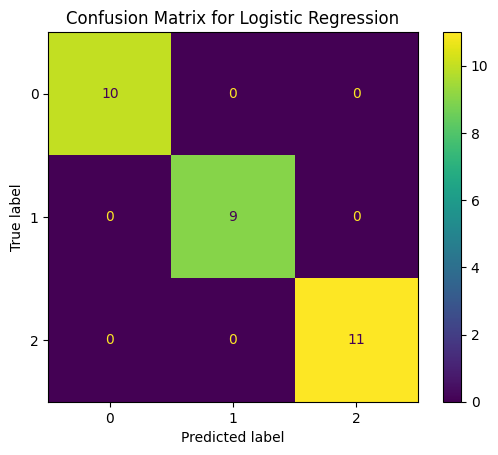

In [119]:
# Displaying confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=logreg.classes_).plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

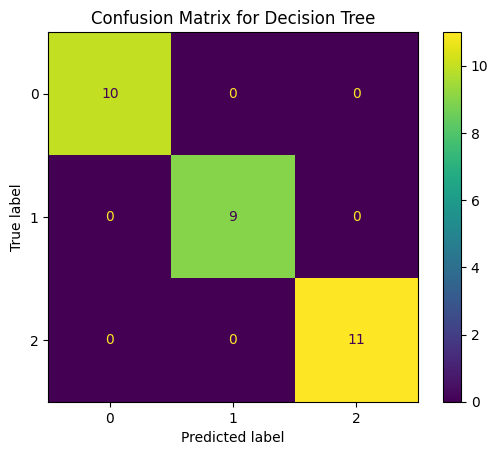

In [120]:
ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=dtree.classes_).plot()
plt.title('Confusion Matrix for Decision Tree')
plt.show()

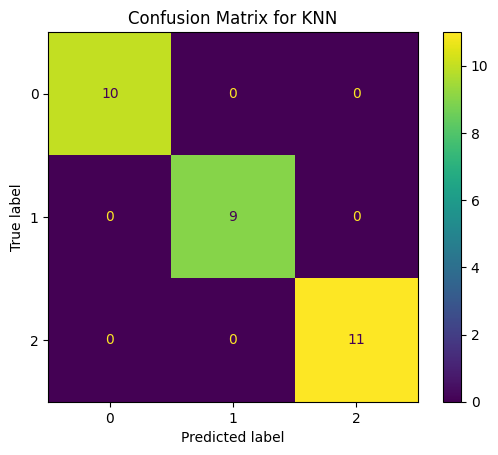

In [121]:
ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_).plot()
plt.title('Confusion Matrix for KNN')
plt.show()

**Classification Report**

In [128]:
print("Classification Report for Logistic Regression:\n",classification_report(y_test,y_pred))

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [126]:
print("Classification Report for KNN:\n",classification_report(y_test,y_pred_knn))

Classification Report for KNN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [127]:
print("Classification Report for Decision Tree:\n",classification_report(y_test,y_pred_dtree))


Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [2]:
print("Project Completed")

Project Completed
